In [123]:
# Detect and drop duplicate rows.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential, optimizers

# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Print duplicate rows
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)
print(f"\nNumber of rows after removing duplicates: {len(df)}")

# Detect and print rows with missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"\nRows with missing values found: {missing_values}")
else:
    print("\nNo missing values found.")

# Drop rows with missing values
df.dropna(inplace=True)
print(f"Number of rows after removing rows with missing values: {len(df)}")

# Print the cleaned DataFrame (optional)
print("\nData after cleaning:")
print(df)

Duplicate rows found:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

Number of rows after removing duplicates: 1337

No missing values found.
Number of rows after removing rows with missing values: 1337

Data after cleaning:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


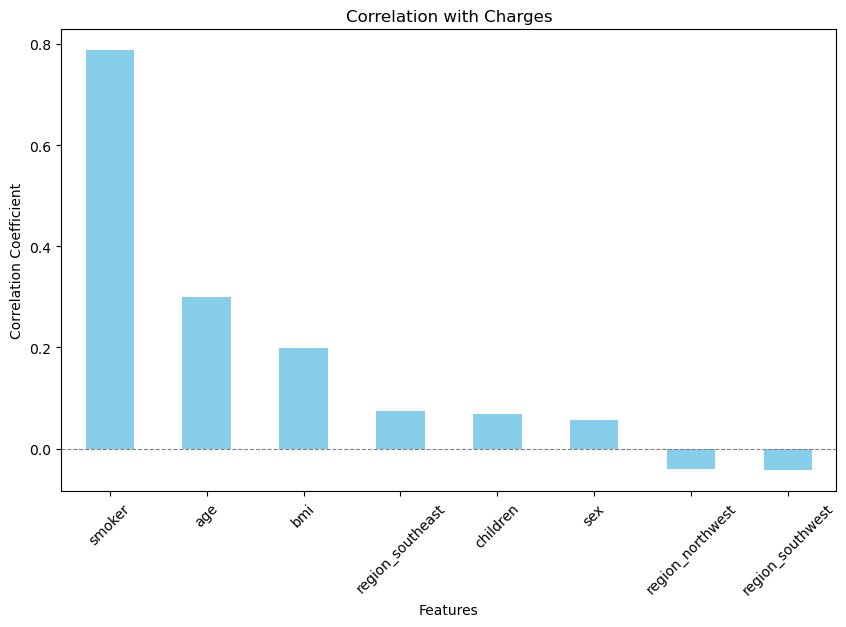

In [31]:
# Find the correlation between the independent variables and the target variable.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)  # One-hot encoding for region

# Calculate the correlation of all variables with charges
correlation_with_charges = df.corr()['charges'].sort_values(ascending=False)

# Print the correlation with charges
print(correlation_with_charges)

# Visualize the correlation with charges using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_charges.drop('charges').plot(kind='bar', color='skyblue')
plt.title('Correlation with Charges')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0
plt.show()

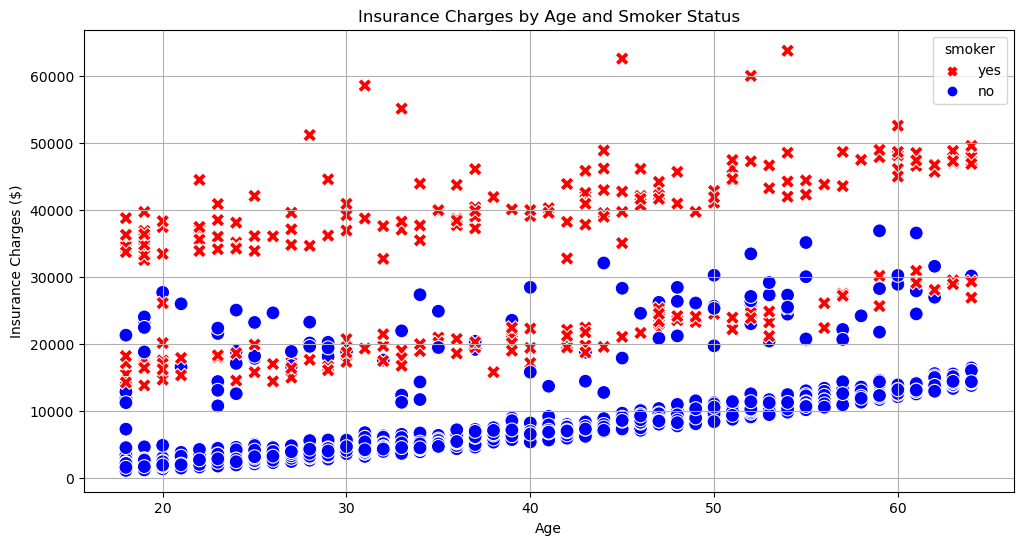

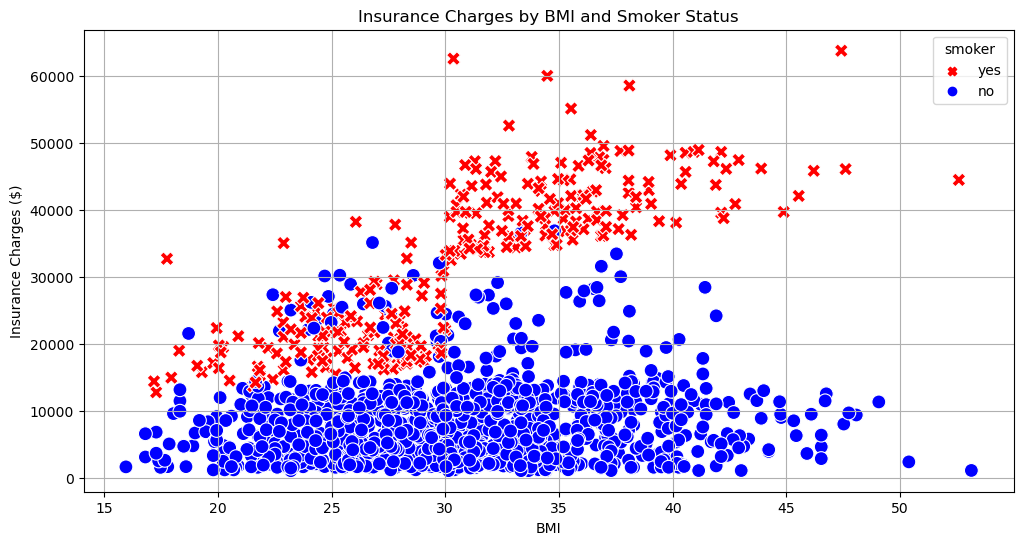

In [33]:
# Visualise the distribution of nodes based on the target variable.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Visualize charges by age with smoker status as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', 
                style='smoker', markers={"yes": "X", "no": "o"}, 
                palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('Insurance Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges ($)')
plt.grid(True)
plt.show()

# Visualize charges by BMI with smoker status as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', 
                style='smoker', markers={"yes": "X", "no": "o"}, 
                palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('Insurance Charges by BMI and Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges ($)')
plt.grid(True)
plt.show()

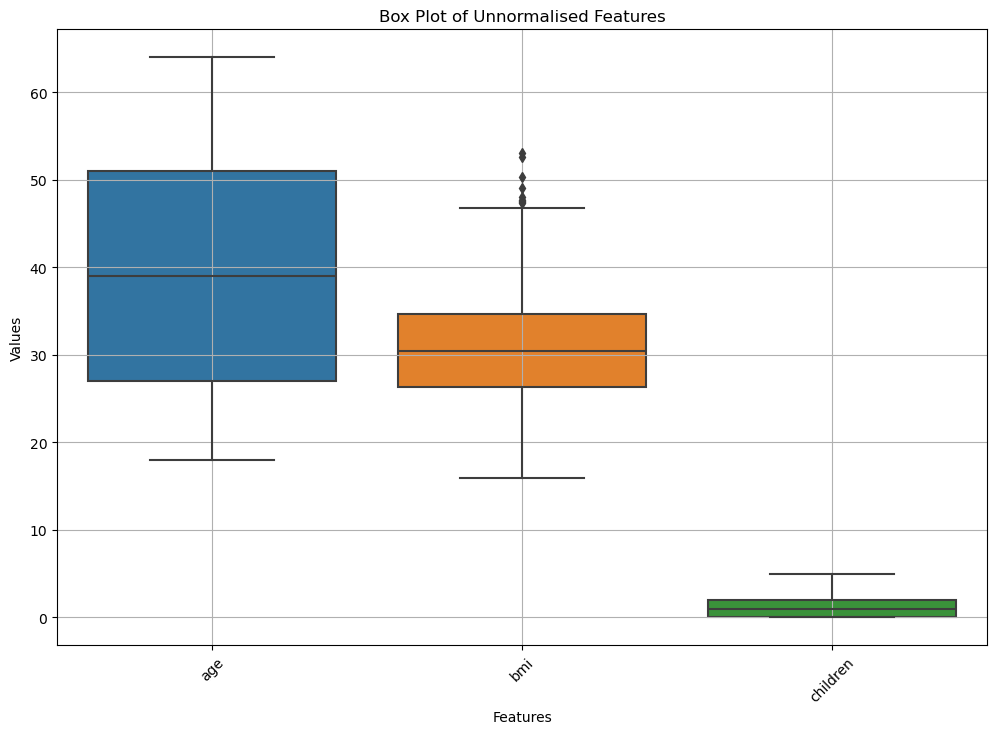

In [37]:
# Produce a boxplot of numerical variables on the same scale before normalisation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Select the numeric features to plot (unnormalised)
numeric_features = df[['age', 'bmi', 'children']]

# Melt the DataFrame to long format for boxplot
df_melted = numeric_features.melt(var_name='Feature', value_name='Value')

# Create the box plot for unnormalised data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.title('Box Plot of Unnormalised Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Rows with outliers: 1338
Rows after removing outliers: 1329


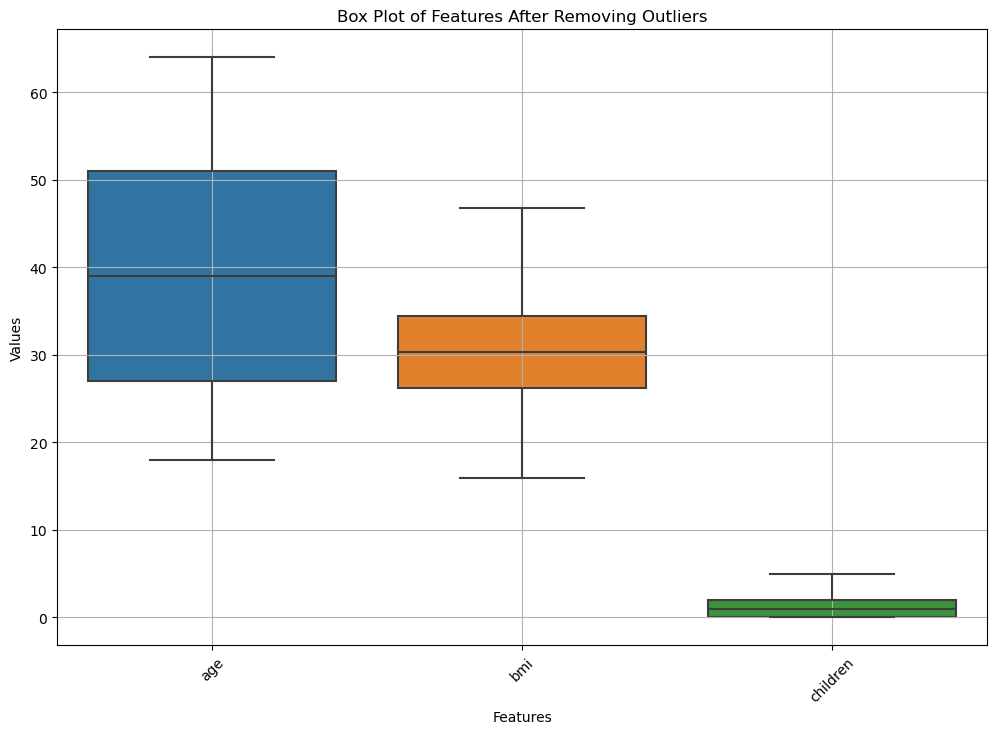

In [39]:
# Remove all outliers using the Interquartile Range (IQR) method.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(dataframe, features):
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        dataframe = dataframe[(dataframe[feature] >= lower_bound) & (dataframe[feature] <= upper_bound)]
    
    return dataframe

# Specify the features from which you want to remove outliers
features_to_check = ['age', 'bmi', 'children']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, features_to_check)

# Print number of rows before and after removing outliers
print(f"Rows with outliers: {len(df)}")
print(f"Rows after removing outliers: {len(df_cleaned)}")

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('outliers_removed_insurance_data.csv', index=False)

# Select the numeric features to plot (after outlier removal)
numeric_features_cleaned = df_cleaned[['age', 'bmi', 'children']]

# Melt the DataFrame to long format for boxplot
df_melted_cleaned = numeric_features_cleaned.melt(var_name='Feature', value_name='Value')

# Create the box plot for cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted_cleaned, x='Feature', y='Value')
plt.title('Box Plot of Features After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Normalised Features:
        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438223 -0.445502 -0.907598 -1.007932    1.975126         -0.568737   
1 -1.509408  0.546061 -0.079734  0.991384   -0.505916         -0.568737   
2 -0.797554  0.415992  1.575994  0.991384   -0.505916         -0.568737   
3 -0.441628 -1.323044 -0.907598  0.991384   -0.505916          1.756959   
4 -0.512813 -0.279960 -0.907598  0.991384   -0.505916          1.756959   

   region_southeast  region_southwest  
0         -0.605812          1.760545  
1          1.649436         -0.567579  
2          1.649436         -0.567579  
3         -0.605812         -0.567579  
4         -0.605812         -0.567579  


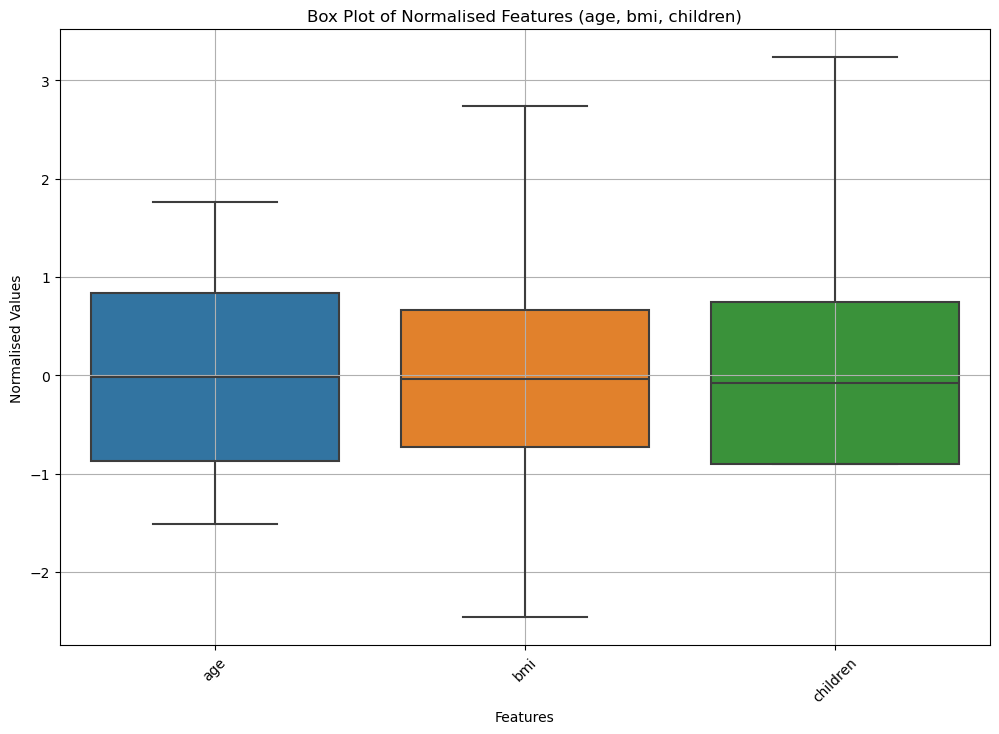

In [41]:
# Perform Z-score normalisation on the independent variables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('outliers_removed_insurance_data.csv')

# Select numeric features for normalisation
numeric_features = df[['age', 'bmi', 'children', 'charges']]
categorical_features = df[['sex', 'smoker', 'region']]

# One-hot encode categorical features
categorical_encoded = pd.get_dummies(categorical_features, drop_first=True)

# Combine numeric and encoded categorical features
X = pd.concat([numeric_features.drop('charges', axis=1), categorical_encoded], axis=1)
y = numeric_features['charges']

# Normalise numeric features (Z-score normalisation)
means = X.mean()
stds = X.std()
X_normalised = (X - means) / stds

# Save the normalised data for the next step
X_normalised.to_csv('normalised_insurance_features.csv', index=False)
y.to_csv('charges.csv', index=False)

# Display the first few rows of the normalised data
print("Normalised Features:")
print(X_normalised.head())

# Melt the DataFrame for boxplot
numeric_cols_normalised = X_normalised[['age', 'bmi', 'children']].melt(var_name='Feature', value_name='Value')

# Create the box plot for normalised data
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols_normalised, x='Feature', y='Value')
plt.title('Box Plot of Normalised Features (age, bmi, children)')
plt.xticks(rotation=45)
plt.ylabel('Normalised Values')
plt.xlabel('Features')
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 0.0133
Mean Absolute Error (MAE): 0.0773
R^2 Score: 0.6703


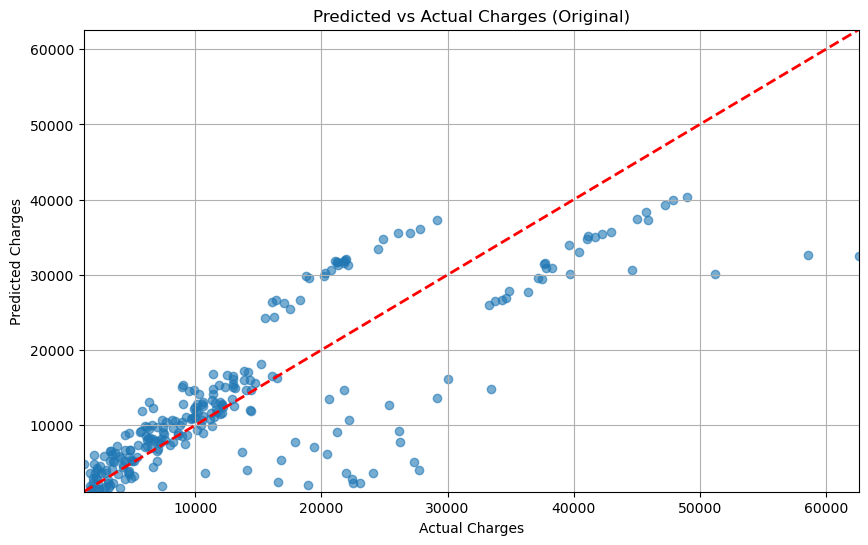

In [1]:
# Create a Linear Regression Model.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalised features and charges data
X_normalised = pd.read_csv('normalised_insurance_features.csv')
y = pd.read_csv('charges.csv')

# Optionally scale 'y'
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y)  # Fit the scaler to 'y'

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=5)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = linear_model.predict(X_val)

# Calculate mean squared error, mean absolute error, and r^2
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred).flatten()  # Use y_scaler to inverse transform
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual charges for original charges
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual Charges (Original)')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")

Mean Squared Error (MSE): 0.0066
Mean Absolute Error (MAE): 0.0462
R^2 Score: 0.8181


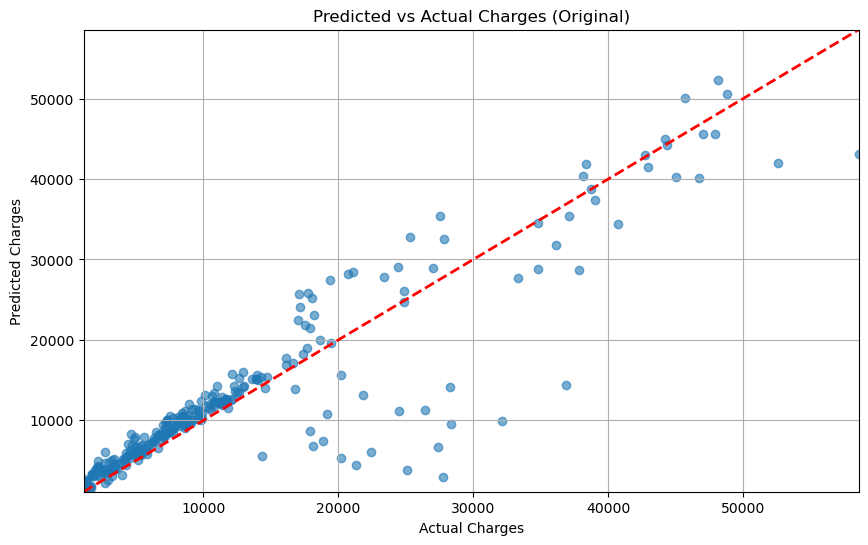

In [3]:
# Create a Polynomial Regression Model.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalised features and charges data
X_normalised = pd.read_csv('normalised_insurance_features.csv')
y = pd.read_csv('charges.csv')

# Optionally scale 'y'
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y)  # Fit the scaler to 'y'

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=10)

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_pred = linear_model.predict(X_val_poly)

# Calculate mean squared error, mean absolute error, and r^2
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred).flatten()  # Use y_scaler to inverse transform
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual charges for original charges
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual Charges (Original)')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")

C:\Users\henry\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0133
Mean Absolute Error (MAE): 0.0775
R^2 Score: 0.6705


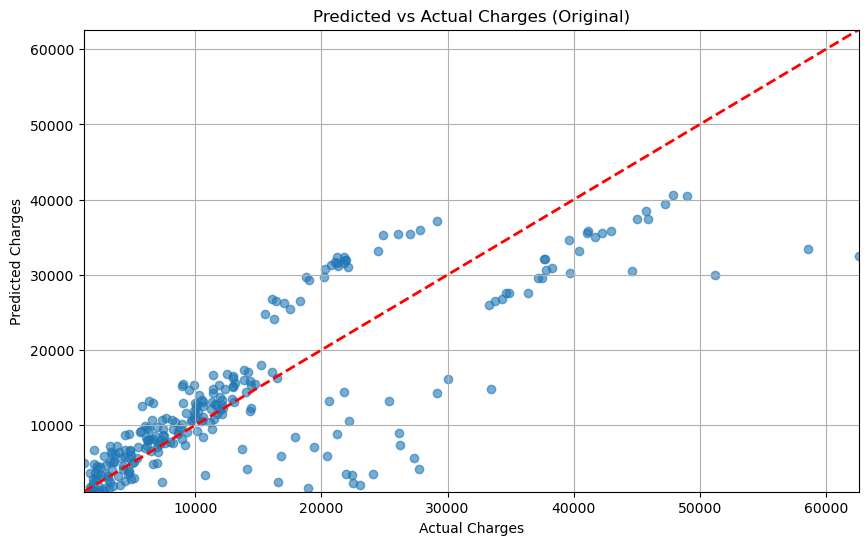

In [13]:
# Create a Linear Regression Model using a Neural Network.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalised features and charges data
X_normalised = pd.read_csv('normalised_insurance_features.csv')
y = pd.read_csv('charges.csv')

# Optionally scale 'y'
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y)  # Fit the scaler to 'y'

# Adjust the hyperparameters
epochs = 100
batch_size = 32
learning_rate = 0.0005

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=5)

# Build the model (a simple neural network with one output for linear regression)
linear_nn_model = Sequential()
linear_nn_model.add(Dense(1, input_shape=(X_train.shape[1],), activation='linear'))  # Input layer with 1 output for regression

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=learning_rate)
linear_nn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
linear_nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

# Make predictions on the validation set
y_pred_scaled = linear_nn_model.predict(X_val)

# Calculate mean squared error, mean absolute error, and r^2
mse = mean_squared_error(y_val, y_pred_scaled)
mae = mean_absolute_error(y_val, y_pred_scaled)
r2 = r2_score(y_val, y_pred_scaled)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred_scaled).flatten()  # Use y_scaler to inverse transform
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual charges for original charges
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual Charges (Original)')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7658 - mae: 0.7734 - val_loss: 0.0628 - val_mae: 0.1984
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0497 - mae: 0.1655 - val_loss: 0.0406 - val_mae: 0.1541
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - mae: 0.1397 - val_loss: 0.0316 - val_mae: 0.1341
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - mae: 0.1234 - val_loss: 0.0258 - val_mae: 0.1186
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205 - mae: 0.1048 - val_loss: 0.0210 - val_mae: 0.1032
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - mae: 0.0954 - val_loss: 0.0186 - val_mae: 0.0957
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 - mae: 0.0826 - val_loss: 0.0163 - val_mae: 0.0887
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - mae: 0.0815 - val_loss: 0.0150 - val_mae: 0.0845
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.009

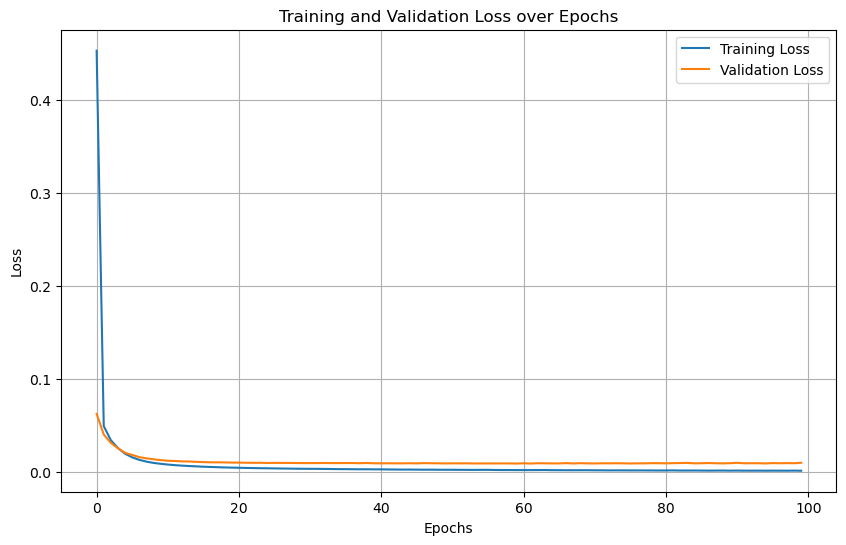

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.0102
Mean Absolute Error (MAE): 0.0623
R^2 Score: 0.7197


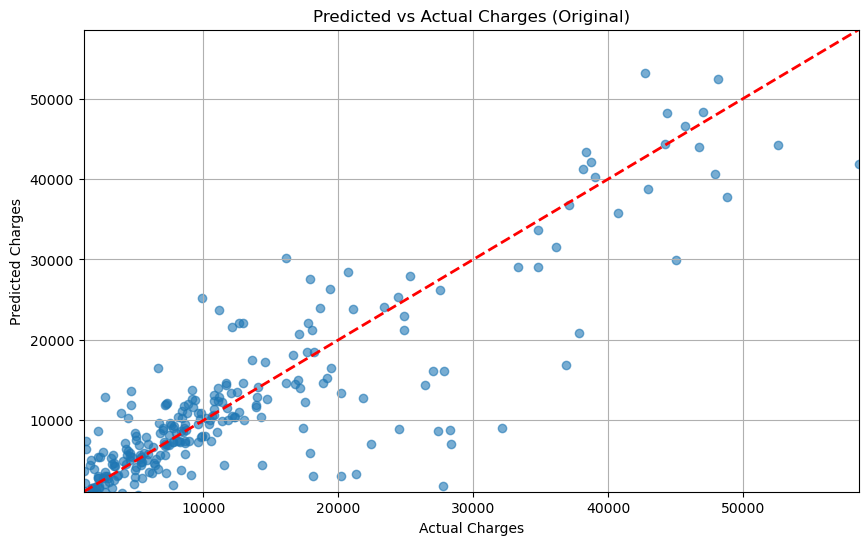

In [17]:
# Create a Polynomial Regression Model using a Neural Network.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from keras import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalised features and charges data
X_normalised = pd.read_csv('normalised_insurance_features.csv')
y = pd.read_csv('charges.csv')

# Optionally scale 'y'
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y)  # Fit the scaler to 'y'

# Adjust hyperparameters for the neural network
epochs = 100
batch_size = 32     
learning_rate = 0.0002

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=10)

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Build the neural network model
model = Sequential()
model.add(Input(shape=(X_train_poly.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train_poly, y_train, validation_data=(X_val_poly, y_val),
                    epochs=epochs, batch_size=batch_size, verbose=1)

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the validation set
y_pred = model.predict(X_val_poly)

# Calculate mean squared error, mean absolute error, and r^2
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred).flatten()  # Use y_scaler to inverse transform
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual charges for original charges
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual Charges (Original)')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2463 - mae: 0.2426 - val_loss: 0.1750 - val_mae: 0.1290
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1914 - mae: 0.1685 - val_loss: 0.1614 - val_mae: 0.1013
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1706 - mae: 0.1358 - val_loss: 0.1576 - val_mae: 0.0953
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1631 - mae: 0.1243 - val_loss: 0.1549 - val_mae: 0.0931
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1611 - mae: 0.1228 - val_loss: 0.1503 - val_mae: 0.0854
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1510 - mae: 0.1017 - val_loss: 0.1466 - val_mae: 0.0810
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1495 - mae: 0.1014 - val_loss: 0.1445 - val_mae: 0.0811
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1482 - mae: 0.1060 - val_loss: 0.1418 - val_mae: 0.0787
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.145

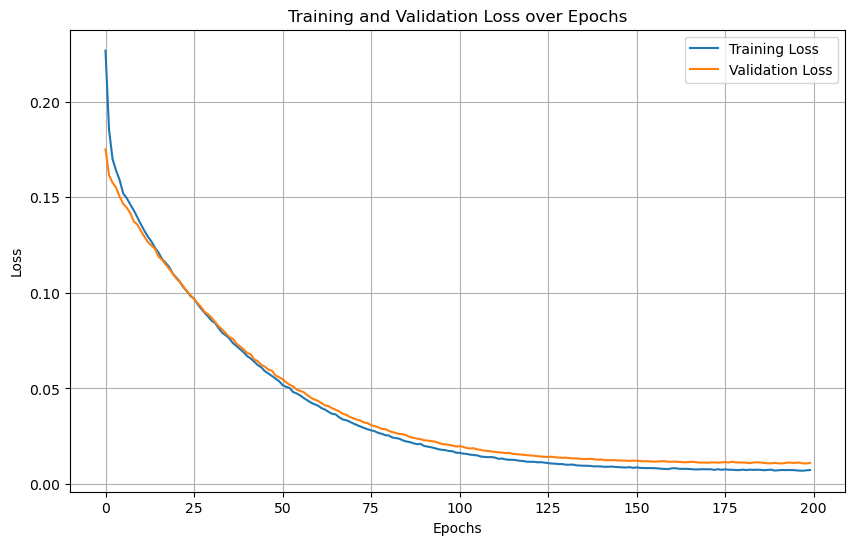

Mean Cross-Validation MSE: 0.0993 ± 0.0054
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error (MSE): 0.0092
Mean Absolute Error (MAE): 0.0489
R^2 Score: 0.7724


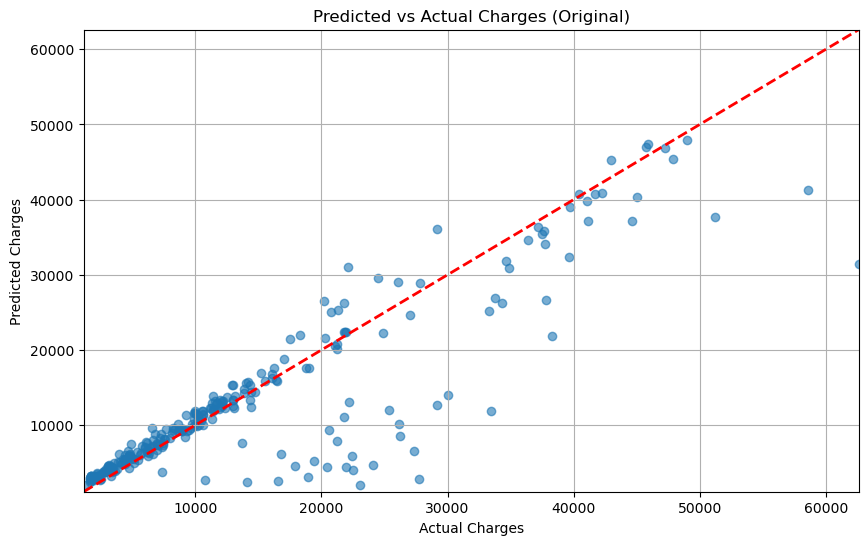

In [9]:
# Create a Regularised Regression Network with MinMax Scaling and K-Fold Cross-Validation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalised features and charges data
X_normalised = pd.read_csv('normalised_insurance_features.csv')
y = pd.read_csv('charges.csv')

# Optionally scale 'y'
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y)  # Fit the scaler to 'y'

# Adjust the hyperparameters
epochs = 200
batch_size = 32     
learning_rate = 0.0002

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=5)

# Build the model with Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Increased units and added L2 regularisation
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Another layer with regularisation
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Further hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model with the custom learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Fit the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_scores = []

for train_index, val_index in kf.split(X_normalised):
    X_train_cv, X_val_cv = X_normalised.iloc[train_index], X_normalised.iloc[val_index]
    y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

    # Build a new model for each fold
    model_cv = Sequential()
    model_cv.add(Input(shape=(X_train_cv.shape[1],)))  # Input layer for cross-validation
    model_cv.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model_cv.add(Dropout(0.2))
    model_cv.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model_cv.add(Dropout(0.2))
    model_cv.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model_cv.add(Dense(1))
    
    model_cv.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
    
    # Fit the model for this fold
    history_cv = model_cv.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv),
                               epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=0)

    # Evaluate and store the score for this fold
    score = model_cv.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_scores.append(score[0])  # Append the MSE

# Report cross-validation results
print(f"Mean Cross-Validation MSE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate mean squared error, mean absolute error, and r^2
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred).flatten()  # Use y_scaler to inverse transform

# Ensure the validation targets (y_val) are flattened too
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual charges for original charges
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual Charges (Original)')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")